# Title

## Abstract

## Table of content

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model, svm
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.metrics import mean_squared_error, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import train_test_split

In [124]:
def standardize(df):
    # We select a column
    for col in df.columns:
        # We check if it is a binary variable
        if df[col].nunique() > 5:
            # If it is not a binary variable,
            # then standardization is achieved
            df[col] = (df[col] - df[col].mean())/df[col].std()

    # Returns the table with all
    # standardized values, column by column
    return df

# 0. Data pre-processing

In [125]:
# Loading data contained in a csv file.

data = pd.read_csv('SambnisImp.csv')

# Filtering of the initial table to keep only the 91 useful variables.
data_filtred = data[["warstds", "ager", "agexp", "anoc", "army85", "autch98", "auto4",
    "autonomy", "avgnabo", "centpol3", "coldwar", "decade1", "decade2",
    "decade3", "decade4", "dem", "dem4", "demch98", "dlang", "drel", "durable",
    "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590", "expgdp", "exrec",
    "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2", "geo34", "geo57",
    "geo69", "geo8", "illiteracy", "incumb", "infant", "inst", "inst3", "life",
    "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper", "mirps0",
    "mirps1", "mirps2", "mirps3", "nat_war", "ncontig", "nmgdp", "nmdp4_alt",
    "numlang", "nwstate", "oil", "p4mchg", "parcomp", "parreg", "part",
    "partfree", "plural", "plurrel", "pol4", "pol4m", "pol4sq", "polch98",
    "polcomp", "popdense", "presi", "pri", "proxregc", "ptime", "reg",
    "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", "sxpnew",
    "sxpsq", "tnatwar", "trade", "warhist", "xconst"]]

# Display of the first lines of the filtered table
data_filtred.head()

,warstds,ager,agexp,anoc,army85,autch98,auto4,autonomy,avgnabo,centpol3,...,seceduc,second,semipol3,sip2,sxpnew,sxpsq,tnatwar,trade,warhist,xconst
0,0,34.461765,8.510845,0,129472.9042,0,3.925812,0.005151,0.432955,1,...,43.770298,0.253,0.058441,0.46176,0.158275,0.052989,0.443259,72.881375,0,3.995912
1,0,34.346348,8.478997,0,129413.0225,0,10.000000,0.000000,0.045052,1,...,43.588363,0.253,0.000000,0.00000,0.158321,0.052663,1.000000,72.900089,0,1.000000
2,0,77.000000,8.481015,0,130431.0145,0,10.000000,0.000000,0.030034,1,...,43.538181,0.253,0.000000,0.00000,0.158425,0.052891,2.000000,72.962880,0,1.000000
3,0,78.000000,8.451628,0,126781.6866,0,10.000000,0.000000,0.022526,1,...,43.490005,0.253,0.000000,0.00000,0.159006,0.052902,2.000000,73.102449,0,1.000000
4,0,79.000000,8.500172,0,130979.2470,0,10.000000,0.000000,0.022526,1,...,43.602238,0.253,0.000000,0.00000,0.158074,0.052706,2.000000,72.850389,0,1.000000


In [126]:
# Defining the corresponding output values and feature vectors for training the different models. The output vector is 
# similar for each model while the feature vectors are different.
# The output binary variable signalling the onset of civil war. 1 corresponds to a recorded civil war while 0 corresponds to otherwise
y = data_filtred['warstds'] 

# All the variables can be used for training except the target variable which is warstds
X = data_filtred.drop(['warstds'], axis=1)

X.head()

,ager,agexp,anoc,army85,autch98,auto4,autonomy,avgnabo,centpol3,coldwar,...,seceduc,second,semipol3,sip2,sxpnew,sxpsq,tnatwar,trade,warhist,xconst
0,34.461765,8.510845,0,129472.9042,0,3.925812,0.005151,0.432955,1,1,...,43.770298,0.253,0.058441,0.46176,0.158275,0.052989,0.443259,72.881375,0,3.995912
1,34.346348,8.478997,0,129413.0225,0,10.000000,0.000000,0.045052,1,1,...,43.588363,0.253,0.000000,0.00000,0.158321,0.052663,1.000000,72.900089,0,1.000000
2,77.000000,8.481015,0,130431.0145,0,10.000000,0.000000,0.030034,1,1,...,43.538181,0.253,0.000000,0.00000,0.158425,0.052891,2.000000,72.962880,0,1.000000
3,78.000000,8.451628,0,126781.6866,0,10.000000,0.000000,0.022526,1,1,...,43.490005,0.253,0.000000,0.00000,0.159006,0.052902,2.000000,73.102449,0,1.000000
4,79.000000,8.500172,0,130979.2470,0,10.000000,0.000000,0.022526,1,1,...,43.602238,0.253,0.000000,0.00000,0.158074,0.052706,2.000000,72.850389,0,1.000000


# 1. Least Square Method
#### - Step 1 : Try the method with the 88 variables (sklearn) : AUC = 0.77
#### - Step 2 : Try to find significant variables (statmodels)
#### - Step 3 : Retry the linear regression method with significant variables (sklearn) : AUC = 0.80

In [127]:
# Find categorical data
def is_categ(df):
    for col in df.columns:
        if len(set(df[col].values)) < 4:
            print(col, '     \t:\t', set(df[col].values))
            
is_categ(data_filtred)

warstds      	:	 {0, 1}
anoc      	:	 {0, 1}
centpol3      	:	 {0, 1}
coldwar      	:	 {0, 1}
decade1      	:	 {0, 1}
decade2      	:	 {0, 1}
decade3      	:	 {0, 1}
decade4      	:	 {0, 1}
dem      	:	 {0, 1}
incumb      	:	 {0, 1}
major      	:	 {0, 1}
nat_war      	:	 {0, 1}
oil      	:	 {0, 1}
partfree      	:	 {0, 1}
presi      	:	 {0, 1}
warhist      	:	 {0, 1}


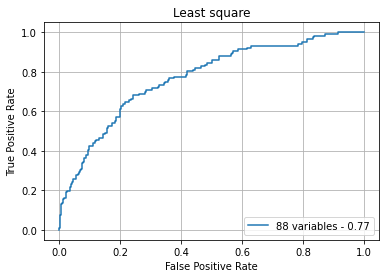

In [128]:
model = linear_model.LinearRegression()
graph_title = "Least square"

X = data_filtred
X = X.drop('warstds',axis=1)
y = data['warstds']

# Predict the probabilities with a cross validation
y_pred = cross_val_predict(model, X, y, cv=10)

# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:])

# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

# Stores the ROC curve plot for each model.
plt.plot(fpr, tpr, label="88 variables" + " - {:.2f}".format(auc_score))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Drawing ROC curves with the legend
plt.legend(loc='lower right')
# Adding the title according to the selected regression type
plt.title(graph_title)
plt.grid()
plt.show()

### Step 2 : Find relevant variables

In [129]:
# Declares the model
import statsmodels.formula.api as smf

mod = smf.ols(formula='warstds ~ + ager + agexp + C(anoc) + army85 + autch98 + auto4 + \
                              autonomy + avgnabo + C(centpol3) + C(coldwar) + C(decade1) + C(decade2) + \
                              C(decade3) + C(decade4) + C(dem) + dem4 + demch98 + dlang + drel + durable + \
                              ef + ef2 + ehet + elfo + elfo2 + etdo4590 + expgdp + exrec + fedpol3 + \
                              fuelexp + gdpgrowth + geo1 + geo2 + geo34 + geo57 + geo69 + geo8 + \
                              illiteracy + C(incumb) + infant + inst + inst3 + life + lmtnest + \
                              ln_gdpen + lpopns + C(major) + manuexp + milper + mirps0 + mirps1 + \
                              mirps2 + mirps3 + C(nat_war) + ncontig + nmgdp + nmdp4_alt + numlang + \
                              nwstate + C(oil) + p4mchg + parcomp + parreg + part + C(partfree) + plural + \
                              plurrel + pol4 + pol4m + pol4sq + polch98 + polcomp + popdense + pri + \
                              proxregc + ptime + reg + regd4_alt + relfrac + seceduc + second + C(presi) + \
                              semipol3 + sip2 + sxpnew + sxpsq + tnatwar + trade + C(warhist) + xconst', data=data_filtred)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
import numpy as np
np.random.seed(2)
res = mod.fit()

# Print thes summary output provided by the library.
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                warstds   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     4.404
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.81e-37
Time:                        14:58:23   Log-Likelihood:                 4824.1
No. Observations:                7140   AIC:                            -9472.
Df Residuals:                    7052   BIC:                            -8867.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1171      0.074  

In [130]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

#confidence intervals
res.conf_int()

,0,1
Intercept,-0.028600,0.262756
C(anoc)[T.1],-0.013473,0.013027
C(centpol3)[T.1],-0.083532,0.013205
C(coldwar)[T.1],-0.002935,0.029439
C(decade1)[T.1],-0.011329,0.011696
...,...,...
sxpnew,-0.182040,-0.044110
sxpsq,-0.006622,0.111926
tnatwar,-0.014683,-0.001630
trade,-0.000186,0.000031


In [131]:
# Filter with P value

new_data = []

for i in range(len(l4)):
    if l4[i] < 0.05:
        new_data.append(l2[i])
new_data

['gdpgrowth',
 'sxpnew',
 'second',
 'proxregc',
 'C(presi)[T.1]',
 'tnatwar',
 'parreg',
 'manuexp',
 'popdense',
 'agexp',
 'auto4',
 'C(decade4)[T.1]',
 'C(nat_war)[T.1]',
 'inst3',
 'mirps0',
 'nwstate']

### Step 3

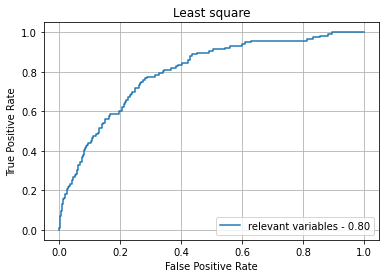

In [132]:
new_data = ['gdpgrowth', 'sxpnew', 'second', 'proxregc', 'presi', 
             'tnatwar', 'parreg', 'manuexp', 'popdense', 'agexp', 'auto4', 
             'decade4', 'nat_war', 'inst3', 'mirps0', 'nwstate']

model = linear_model.LinearRegression()
graph_title = "Least square"

X_newdata = data[new_data]
y = data['warstds']

# Predict the probabilities with a cross validation
y_pred = cross_val_predict(model, X_newdata, y, cv=10)

# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:])

# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

# Stores the ROC curve plot for each model.
plt.plot(fpr, tpr, label="relevant variables" + " - {:.2f}".format(auc_score))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Drawing ROC curves with the legend
plt.legend(loc='lower right')
# Adding the title according to the selected regression type
plt.title(graph_title)
plt.grid()
plt.show()


There are a total of 74 continuous features out of 91 total fields and rest 17 are categorical variables

In [133]:
# Standardising all the continuous features for better scaling of variables
X_std = X.copy()
X_std = standardize(X_std)
X_std

,ager,agexp,anoc,army85,autch98,auto4,autonomy,avgnabo,centpol3,coldwar,...,seceduc,second,semipol3,sip2,sxpnew,sxpsq,tnatwar,trade,warhist,xconst
0,0.011565,-0.075864,0,-0.097323,0.016433,-0.005731,-0.018215,-0.053497,1,1,...,0.076855,0.919162,-0.007550,0.026881,0.094095,0.052437,-0.139284,0.107157,0,0.033310
1,0.008046,-0.079254,0,-0.097473,0.016433,1.775804,-0.082597,-1.315951,1,1,...,0.069821,0.919162,-0.287012,-1.219573,0.094547,0.049137,0.509491,0.107596,0,-1.298861
2,1.308743,-0.079039,0,-0.094927,0.016433,1.775804,-0.082597,-1.364826,1,1,...,0.067881,0.919162,-0.287012,-1.219573,0.095567,0.051447,1.674799,0.109070,0,-1.298861
3,1.339237,-0.082167,0,-0.104053,0.016433,1.775804,-0.082597,-1.389263,1,1,...,0.066018,0.919162,-0.287012,-1.219573,0.101303,0.051559,1.674799,0.112345,0,-1.298861
4,1.369731,-0.077000,0,-0.093556,0.016433,1.775804,-0.082597,-1.389263,1,1,...,0.070357,0.919162,-0.287012,-1.219573,0.092107,0.049569,1.674799,0.106430,0,-1.298861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,-0.093999,-0.262238,0,-0.306074,0.016433,0.602620,-0.082597,0.334757,1,0,...,0.213322,0.415169,-0.007124,-0.254582,0.259141,-0.174152,-0.655817,0.250157,0,-0.409535
7136,-0.063505,-0.170693,0,-0.306074,0.016433,0.602620,-0.082597,0.334757,1,0,...,0.213322,0.415169,-0.006284,-0.254582,0.452436,-0.100702,-0.655817,0.103778,0,-0.409535
7137,-0.033010,0.145460,0,-0.306074,0.016433,0.602620,-0.082597,0.334757,1,0,...,0.213322,0.415169,-0.006889,-0.254582,0.097356,0.050272,-0.655817,0.256251,0,-0.409535
7138,-0.002516,-0.075457,0,-0.306074,-1.380375,0.602620,-0.082597,0.334757,1,0,...,0.213322,0.415169,-0.006289,-0.254582,0.090076,0.049652,-0.655817,0.106613,0,-0.409535


# 2. SVM
Fitting a SVM to the dataset for predicting the onset of civil war. Instead of binary prediction, we will fit a SVM which outputs the 
probability of belonging to a class so that we can plot a ROC curve by varying the threshold probability and obtain the respective AUC. 

In [149]:
# fitting a svm model with default parameters
model_Svm = svm.SVC(probability = True, gamma = 'scale')
# Training the model by cross validation. Employing cross validation is preferable to just training on the whole
# dataset and predicting on the same dataset as the latter approach entails overfitting. 

# Predict the probabilities with a cross validation
y_pred3 = cross_val_predict(model_Svm, X_std, y, cv=5,method='predict_proba')
# Compute the False Positive Rate and True Positive Rate
fpr3, tpr3, _ = roc_curve(y, y_pred3[:,1])
# Compute the area under the fpr-tpr curve
auc_score3 = auc(fpr3, tpr3)

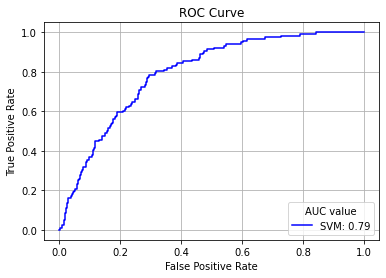

In [150]:
plt.plot(fpr3, tpr3, 'b', label ="SVM: " + str(round(auc_score3,2)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");
plt.legend(loc="lower right",title="AUC value")
plt.grid()
plt.show()

# 3. Neural Networks
We will try to use a neural network to classify the dataset according to the variables. As neural networks have been shown to have a higher accuracy than the traditional methods, it is expected that this should lead to a better AUC

In [152]:
mlp = MLPClassifier()
# Training the model by cross validation. Employing cross validation is preferable to just training on the whole
# dataset and predicting on the same dataset as the latter approach entails overfitting. 

# Predict the probabilities with a cross validation
y_pred2 = cross_val_predict(mlp, X_std, y, cv=5, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr2, tpr2, _ = roc_curve(y, y_pred2[:, 1])
# Compute the area under the fpr-tpr curve
auc_score2 = auc(fpr2, tpr2)

C:\Users\redaa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\redaa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


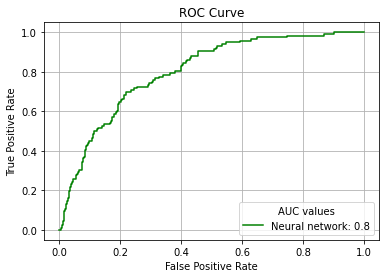

In [153]:
plt.plot(fpr2, tpr2, 'g', label ="Neural network: " + str(round(auc_score2,2)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");
plt.legend(loc="lower right",title="AUC values")
plt.grid()
plt.show()

# 4. Bayes classifier
We also try to implement the simplest method of classification, bayes classifier, to benchmark the accuracy of other methods

In [157]:
model_naive = GaussianNB()

# Training the model by Fearon and laitin by cross validation. Employing cross validation is preferable to just training on the whole
# dataset and predicting on the same dataset as the latter approach entails overfitting. 

# Predict the probabilities with a cross validation
y_pred = cross_val_predict(model_naive, X_std, y, cv=5, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr1, tpr1, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpr-tpr curve
auc_score = auc(fpr1, tpr1)

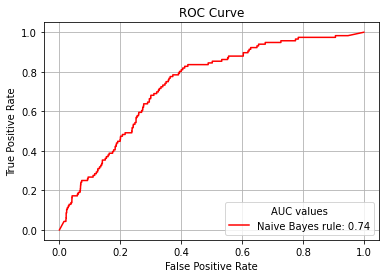

In [156]:
plt.plot(fpr1, tpr1, 'r', label ="Naive Bayes rule: " + str(round(auc_score,2)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");
plt.legend(loc="lower right",title="AUC values")
plt.grid()
plt.show()

# 5. Analysis of results

# 6. Conclusion

# 5. Analysis of results

# 6. Conclusion